PRECIZIA:
Precizia SVM pe datele originale: 0.7489177489177489
Precizia SVM pe datele reduse cu PCA: 0.7056277056277056
Precizia RN pe datele originale: 0.7056277056277056
Precizia RN pe datele reduse cu PCA: 0.6883116883116883

-----------------------------------------------------------
Precizia SVM pe datele originale: 74.89177489177489
Precizia SVM pe datele reduse cu PCA: 70.56277056277057
Precizia RN pe datele originale: 70.56277056277057
Precizia RN pe datele reduse cu PCA: 68.83116883116884

-----------------------------------------------------------
MODEL MATRICE DE CONFUZIE: 
|   TP   |   FP   |
|   FN   |   TN   |
TP - The predicted values is Positive and it s Positive
FP - The predicted values is Positive but it s False
FN - The predicted values is Negative but it s Positive
TN - The predicted values is Negative and it s Negative

-----------------------------------------------------------
Matricea de confuzie pentru SVM pe datele originale:
[[137  11]
 [ 47  36]]
Raportul d

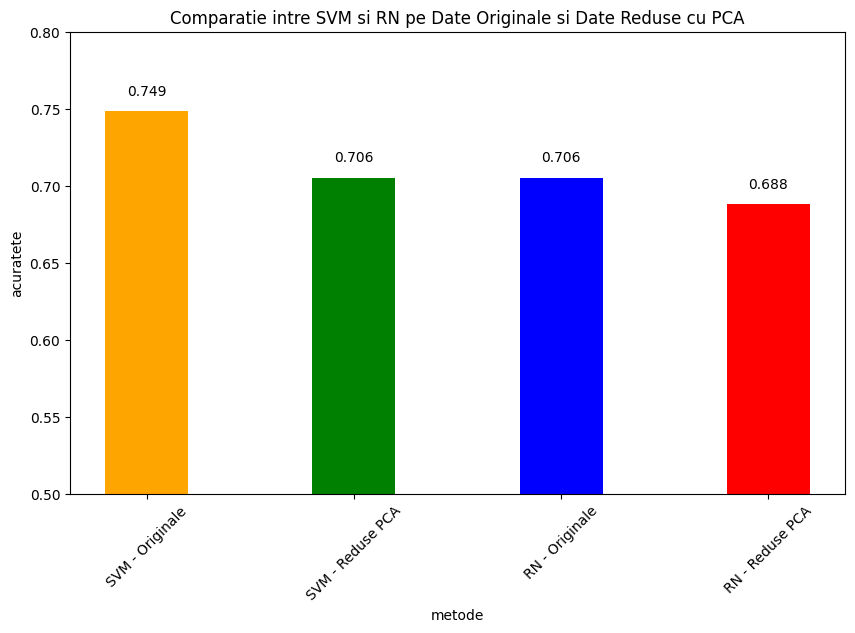

In [ ]:
from sklearn.preprocessing import StandardScaler 
# pentru scalare
from sklearn.decomposition import PCA
# reduce dimensiunea seturilor de date complexe
# identificand caracteristicile cele mai imp
from sklearn.model_selection import train_test_split
# pentru a imparti in set de antrenare si test
# permite setarea dimensiunii setului de testare
# si poate amesteca datele inainte de impartire
from sklearn.svm import SVC
# implementeaza Support Vector Classification -> o forma de
# clasificare utilizand SVM. utilizeaza dif kernel uri
# pt a modela seturile de date intr un spatiu multidimensional
from sklearn.neural_network import MLPClassifier
# utilizat pt a contrui RN artificiale pt clasificare
# antreneaza modele bazate pe perceptron multistrat pt a
# rezolva problema de clasificare
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# pt evaluarea performantei: acurtatete,
# raport cu diferite metrici si matricea de confuzie
import pandas as pd
# manipularea si analiza datelor
import matplotlib.pyplot as plt
# vizualizarea grafica a datelor


# CITIREA SETULUI DE DATE
data = pd.read_csv('diabetes.csv')


# SEPARAREA SETULUI IN 2 COMPONENTE

X = data.drop('Outcome', axis=1)
# caracteristici: contine tot, in afara de Outcome
# motiv pentru care folosim drop, iar prin axis se elimina o coloana

y = data['Outcome']
# variabila tinta: contine doar Outcome, ce dorim sa clasificam/prezicem


# SCALAREA DATELOR

scaler = StandardScaler() # se creeaza un obiect de tip StandardScaler
X_scaled = scaler.fit_transform(X)
# standardizeaza caracteristicile, elimina media
# si scaleaza la deviatia standard astfel incat
# fiecare caracteristica sa aiba media = 0 si deviatia = 1
# X_scaled contine aceleasi date ca X, doar ca standardizate => media/dev_stand
# prin acest proces ne asiguram ca scala datelor nu afecteaza algoritmii


# IMPARTIM DATELE ORIGINALE IN SETURI de antrenare = 70% si testare = 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
# random_state=50 impartirea setului de date in mod aleatoriu
# folosit pentru obtinerea aceluias rezultat la fiecare rulare


# ANTRENARE SVM PE DATE ORIGINALE

svm = SVC(kernel='rbf', random_state=50)
# se creeaza un obiect de tip SVM
# RadialBasisFunction -> este cel mai comun datorita performantelor bune
# pentru multe tipuri de date. transforma datele intr un spatiu de dimensiuni
# superioare pentru a face datele mai usor de analizat
# si random_state = 50 asiguram ca antrenarea si predictiile raman constante la rulare
svm.fit(X_train, y_train)
# se antreneaza modelul, il ajustam la train si invata sa faca
# predictii pe baza caracteristicilor X_train si etichetelor coresp y_train
predictions_orig = svm.predict(X_test)
# pt a face predictii pe X_test. prezice etichete coresp datelor
# de testare pe baza modelului antrenat
accuracy_orig = accuracy_score(y_test, predictions_orig)
# se compara etichetele prezise cu cele reale


# REDUCEM DIMENSIUNEA CU PCA

nrcomp = 2 # nr de componente principale
pca = PCA(nrcomp) # initializam un obiect si reducem la nrcomp
X_pca = pca.fit_transform(X_scaled)
# ajustam PCA pe datele standardizate si transformam datele
# intr un set nou X_pca ce reprezinta componentele principale


# IMPARTIM DATELE REDUSE IN SETURI de antrenare = 70% si testare = 30%

X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=50)
# aceleasi explicatii ca mai sus


# ANTRENARE SVM PE DATE REDUSE CU PCA

svm_pca = SVC(kernel='rbf', random_state=50)
svm_pca.fit(X_pca_train, y_train)
predictions_pca = svm_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, predictions_pca)
# aceleasi explicatii ca mai sus, doar ca se foloseste PCA la acest pas
# se realizeaza la 2 compnente principale, asa cum am creat obiectul


# ANTRENARE RN PE DATELE ORIGINALE

mlp_orig = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=1000, random_state=50)
# initializam un model MLPClassifier. hidden_layer specifica arhitectura RN
# si indica ca exista 2 straturi ascunse, fiecare cu 32 neuroni
# acest nr poate varia(16 32 64) si testa pentru a vedea daca se schimba acuratetea
# la fel, se poate lasa un singur layer, dar in cazul meu aceasta a fost varianta
# ce mai buna, max_iter nr de iteratii maxim pe care le poate efectua in timpul antrenarii
mlp_orig.fit(X_train, y_train)
# antreneaza modelul RN pe X_train si etichetele coresp
# in timpul acesta, RN invata relatiile dintre caract pt clasif corecte
predictions_mlp_orig = mlp_orig.predict(X_test)
# modelul antrenat este utilizat pt  predictii pe X_test la fel ca anterior
accuracy_mlp_orig = accuracy_score(y_test, predictions_mlp_orig)


# ANTRENARE RN PE DATELE REDUSE CU PCA

mlp_pca = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=1000, random_state=50)
mlp_pca.fit(X_pca_train, y_train)
predictions_mlp_pca = mlp_pca.predict(X_pca_test)
accuracy_mlp_pca = accuracy_score(y_test, predictions_mlp_pca)
# aceleasi explicatii ca mai sus, doar ca se foloseste PCA la acest pas
# se realizeaza la 2 compnente principale, asa cum am creat obiectul


# PRECIZIA PENTRU FIECARE METODA

print("PRECIZIA:")
print("Precizia SVM pe datele originale:", accuracy_orig)
print("Precizia SVM pe datele reduse cu PCA:", accuracy_pca)
print("Precizia RN pe datele originale:", accuracy_mlp_orig)
print("Precizia RN pe datele reduse cu PCA:", accuracy_mlp_pca)
print()
print("-----------------------------------------------------------")
print("Precizia SVM pe datele originale:", accuracy_orig * 100)
print("Precizia SVM pe datele reduse cu PCA:", accuracy_pca * 100)
print("Precizia RN pe datele originale:", accuracy_mlp_orig * 100)
print("Precizia RN pe datele reduse cu PCA:", accuracy_mlp_pca * 100)

print()
print("-----------------------------------------------------------")
print("MODEL MATRICE DE CONFUZIE: ")
print("|   TP   |   FP   |")
print("|   FN   |   TN   |")
print("TP - The predicted values is Positive and it s Positive")
print("FP - The predicted values is Positive but it s False")
print("FN - The predicted values is Negative but it s Positive")
print("TN - The predicted values is Negative and it s Negative")

# MATRICEA DE CONFUZIE SI RAPORT DE CLASIF PT SVM PE DATE ORIGINALE

conf_matrix_orig = confusion_matrix(y_test, predictions_orig)
print()
print("-----------------------------------------------------------")
print("Matricea de confuzie pentru SVM pe datele originale:")
print(conf_matrix_orig)
print("Raportul de clasificare pentru SVM pe datele originale:")
print(classification_report(y_test, predictions_orig))


# MATRICEA DE CONFUZIE SI RAPORT DE CLASIF PT SVM PE DATE REDUSE CU PCA

conf_matrix_pca = confusion_matrix(y_test, predictions_pca)
print()
print("-----------------------------------------------------------")
print("Matricea de confuzie pentru SVM pe datele reduse cu PCA:")
print(conf_matrix_pca)
print("Raportul de clasificare pentru SVM pe datele reduse cu PCA:")
print(classification_report(y_test, predictions_pca))


# MATRICEA DE CONFUZIE SI RAPORT DE CLASIF PT RN PE DATE ORIGINALE

conf_matrix_mlp_orig = confusion_matrix(y_test, predictions_mlp_orig)
print()
print("-----------------------------------------------------------")
print("Matricea de confuzie pentru RN pe datele originale:")
print(conf_matrix_mlp_orig)
print("Raportul de clasificare pentru RN pe datele originale:")
print(classification_report(y_test, predictions_mlp_orig))


# MATRICEA DE CONFUZIE SI RAPORT DE CLASIF PT RN  PE DATE REDUSE CU PCA

conf_matrix_mlp_pca = confusion_matrix(y_test, predictions_mlp_pca)
print()
print("-----------------------------------------------------------")
print("Matricea de confuzie pentru RN pe datele reduse cu PCA:")
print(conf_matrix_mlp_pca)
print("Raportul de clasificare pentru RN pe datele reduse cu PCA:")
print(classification_report(y_test, predictions_mlp_pca))


# COMPARATIA INTRE METODE

accuracies = [accuracy_orig, accuracy_pca, accuracy_mlp_orig, accuracy_mlp_pca]

# declaram numele metodelor
models = ['SVM - Originale', 'SVM - Reduse PCA', 'RN - Originale', 'RN - Reduse PCA']

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['orange', 'green', 'blue', 'red'], width=0.4)
plt.xlabel('metode')
plt.ylabel('acuratete')
plt.title('Comparatie intre SVM si RN pe Date Originale si Date Reduse cu PCA')

# text pt fiecare bara
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', color='black', fontsize=10)

plt.ylim(0.5, 0.8)  # limite pt vizualizare mai buna

plt.xticks(rotation=45)  # pt a face etichetele mai vizibile pe Ox

plt.show()

# RAPORTUL DE CLASIFICARE:

# precision arata cat % din 0(nu)/1(diabet) au fost clasificate corect,
# ia doar exemplele true pozitive(TP) fata de cele TP+FP

# recall  arata cat % sunt TP fata de TP+FN, cat % a identificat corect

# f1-score este o medie armonica intre precision si recall, pentru o balanta intre cele doua

# support pt cate date avem in fiecare caz

# accuracy arata proportia totala de exemple clasificate corect TP+TN

# macro avg reprezinta media aritmetica a preciziei, recall ului si scorului f1 pt fiecare clasa
# weighted avg media ponderata a acestora cand un 0/1 are mai multe exemple decat cealalata
